# Задача 2: Аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:
$$f(x) = sin(\frac{x}{5}) * e^{\frac{x}{10}} + 5 * e^{\frac{x}{2}}$$
В этом задании мы будем приближать указанную функцию с помощью многочленов.

In [1]:
import numpy as np
from scipy import linalg 
import matplotlib.pyplot as plt

In [2]:
# Function
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

In [3]:
x = np.linspace(1, 15, 100)
y = f(x)

## Linear approximating 

In [12]:
A = np.array([[1, 1], [15, 1]])
b = np.array([f(1), f(15)])
solution = linalg.solve(A, b.reshape(2,1))
solution

array([[-0.18692825],
       [ 3.43914511]])

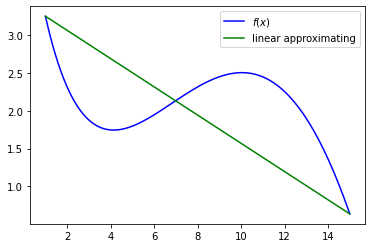

In [11]:
p_1 = np.poly1d(solution.reshape(1,2)[0])

y_1 = p_1(x)

plt.plot(x, y, "b", label="$f(x)$")
plt.plot(x, y_1, "g", label="linear approximating")
plt.legend()

plt.show()

## Quadratic approximating

In [13]:
A = np.array([[1, 1, 1], 
              [64, 8, 1], 
              [225, 15, 1]])
b = np.array([f(1), f(8), f(15)])
solution = linalg.solve(A, b.reshape(3,1))
solution

array([[-0.00760104],
       [-0.06531159],
       [ 3.32512949]])

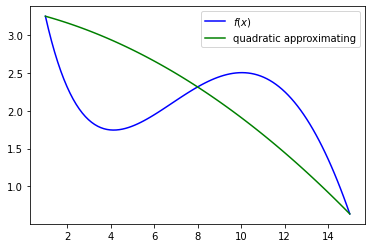

In [15]:
p_2 = np.poly1d(solution.reshape(1,3)[0])

y_2 = p_2(x)

plt.plot(x, y, "b", label="$f(x)$")
plt.plot(x, y_2, "g", label="quadratic approximating")
plt.legend()

plt.show()

## Cubic approximating

In [31]:
A = np.array([[1, 1, 1, 1], 
              [64, 16, 4, 1], 
              [1000, 100, 10, 1], 
              [3375, 225, 15, 1]])
b = np.array([f(1), f(4), f(10), f(15)])
solution = linalg.solve(A, b.reshape(4,1))
solution

array([[-0.00823565],
       [ 0.19333685],
       [-1.29552587],
       [ 4.36264154]])

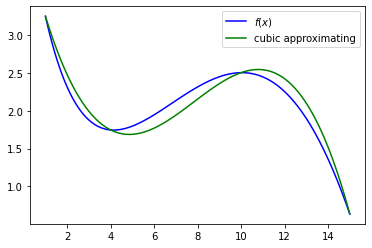

In [32]:
p_3 = np.poly1d(solution.reshape(1,4)[0])

y_3 = p_3(x)

plt.plot(x, y, "b", label="$f(x)$")
plt.plot(x, y_3, "g", label="cubic approximating")
plt.legend()

plt.show()

*Answer:*

In [38]:
solution = list(reversed(solution))
solution

[array([4.36264154]),
 array([-1.29552587]),
 array([0.19333685]),
 array([-0.00823565])]

In [39]:
with open('submission-2.txt', 'w') as f:
    f.write(f"{solution[0][0]} {solution[1][0]} {solution[2][0]} {solution[3][0]}")